<a href="https://colab.research.google.com/github/MKVishnuram/Programming/blob/main/Vishnu_prjct_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Load

PIMA Diabetes Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the diabetes dataset to a pandas DataFrame
diab_dset = pd.read_csv('/content/drive/MyDrive/Project/Diabetes prediction/Datasets/diabetes.csv')

In [5]:
# printing the first 5 rows of the dataset
diab_dset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# EDA Analysis

In [6]:
diab_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# number of rows and Columns in this dataset
diab_dset.shape

(768, 9)

In [8]:
diab_dset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
diab_dset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
diabfree_pat = diab_dset.loc[diab_dset ['Outcome'] == 0]
diabhas_pat = diab_dset.loc[diab_dset ['Outcome'] == 1]

In [11]:
diabfree_pat

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
..                        ...  ...      ...  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[500 rows x 9 columns]

In [12]:
diabhas_pat

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                       0.672   32        1  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
..                        ...  ...      ...  
755                     1.057   37        1  
757                     0.258   52        1  
759                     0.278   66        1  
761                     0.403   43        1  
766                     0.349   47        1  

[268 rows x 9 columns]

# Univariate analysis of Glucose Levels

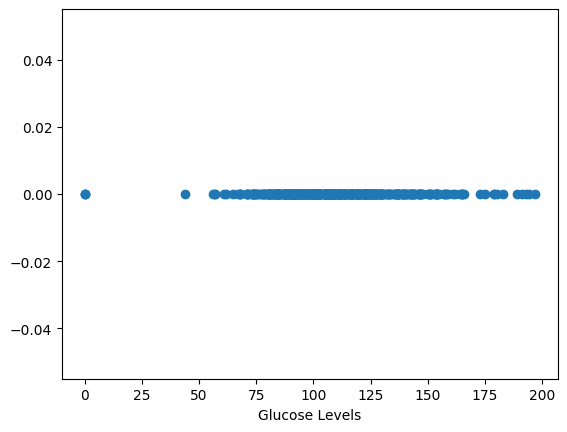

In [13]:
plt.plot(diabfree_pat['Glucose'],np.zeros_like(diabfree_pat['Glucose']),'o')
plt.xlabel('Glucose Levels')

plt.show()

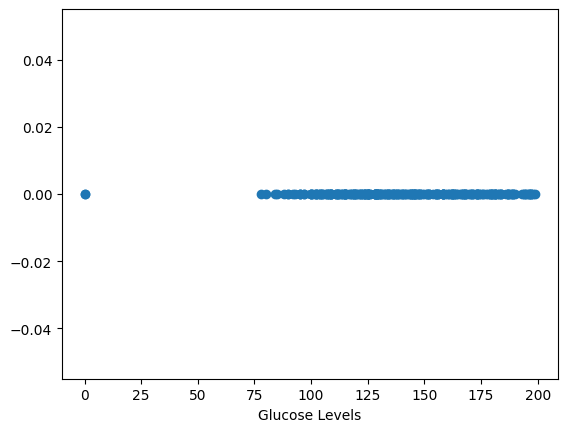

In [14]:
plt.plot(diabhas_pat['Glucose'],np.zeros_like(diabhas_pat['Glucose']),'o')
plt.xlabel('Glucose Levels')

plt.show()

# Bivariate Analysis


In [15]:
import seaborn as sns

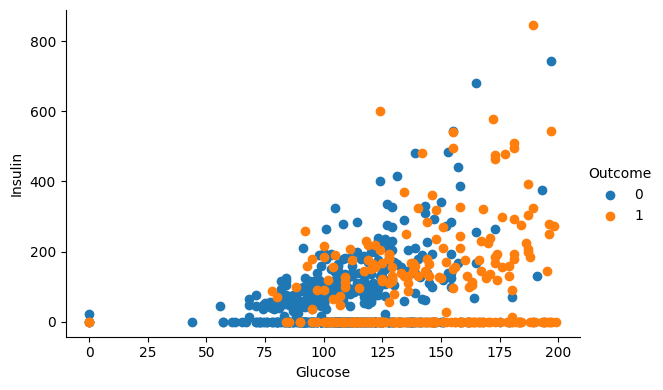

In [16]:
sns.FacetGrid(diab_dset,hue = 'Outcome',height = 4,aspect = 1.5).map(plt.scatter,'Glucose','Insulin').add_legend();
plt.show()

# Multivariate analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


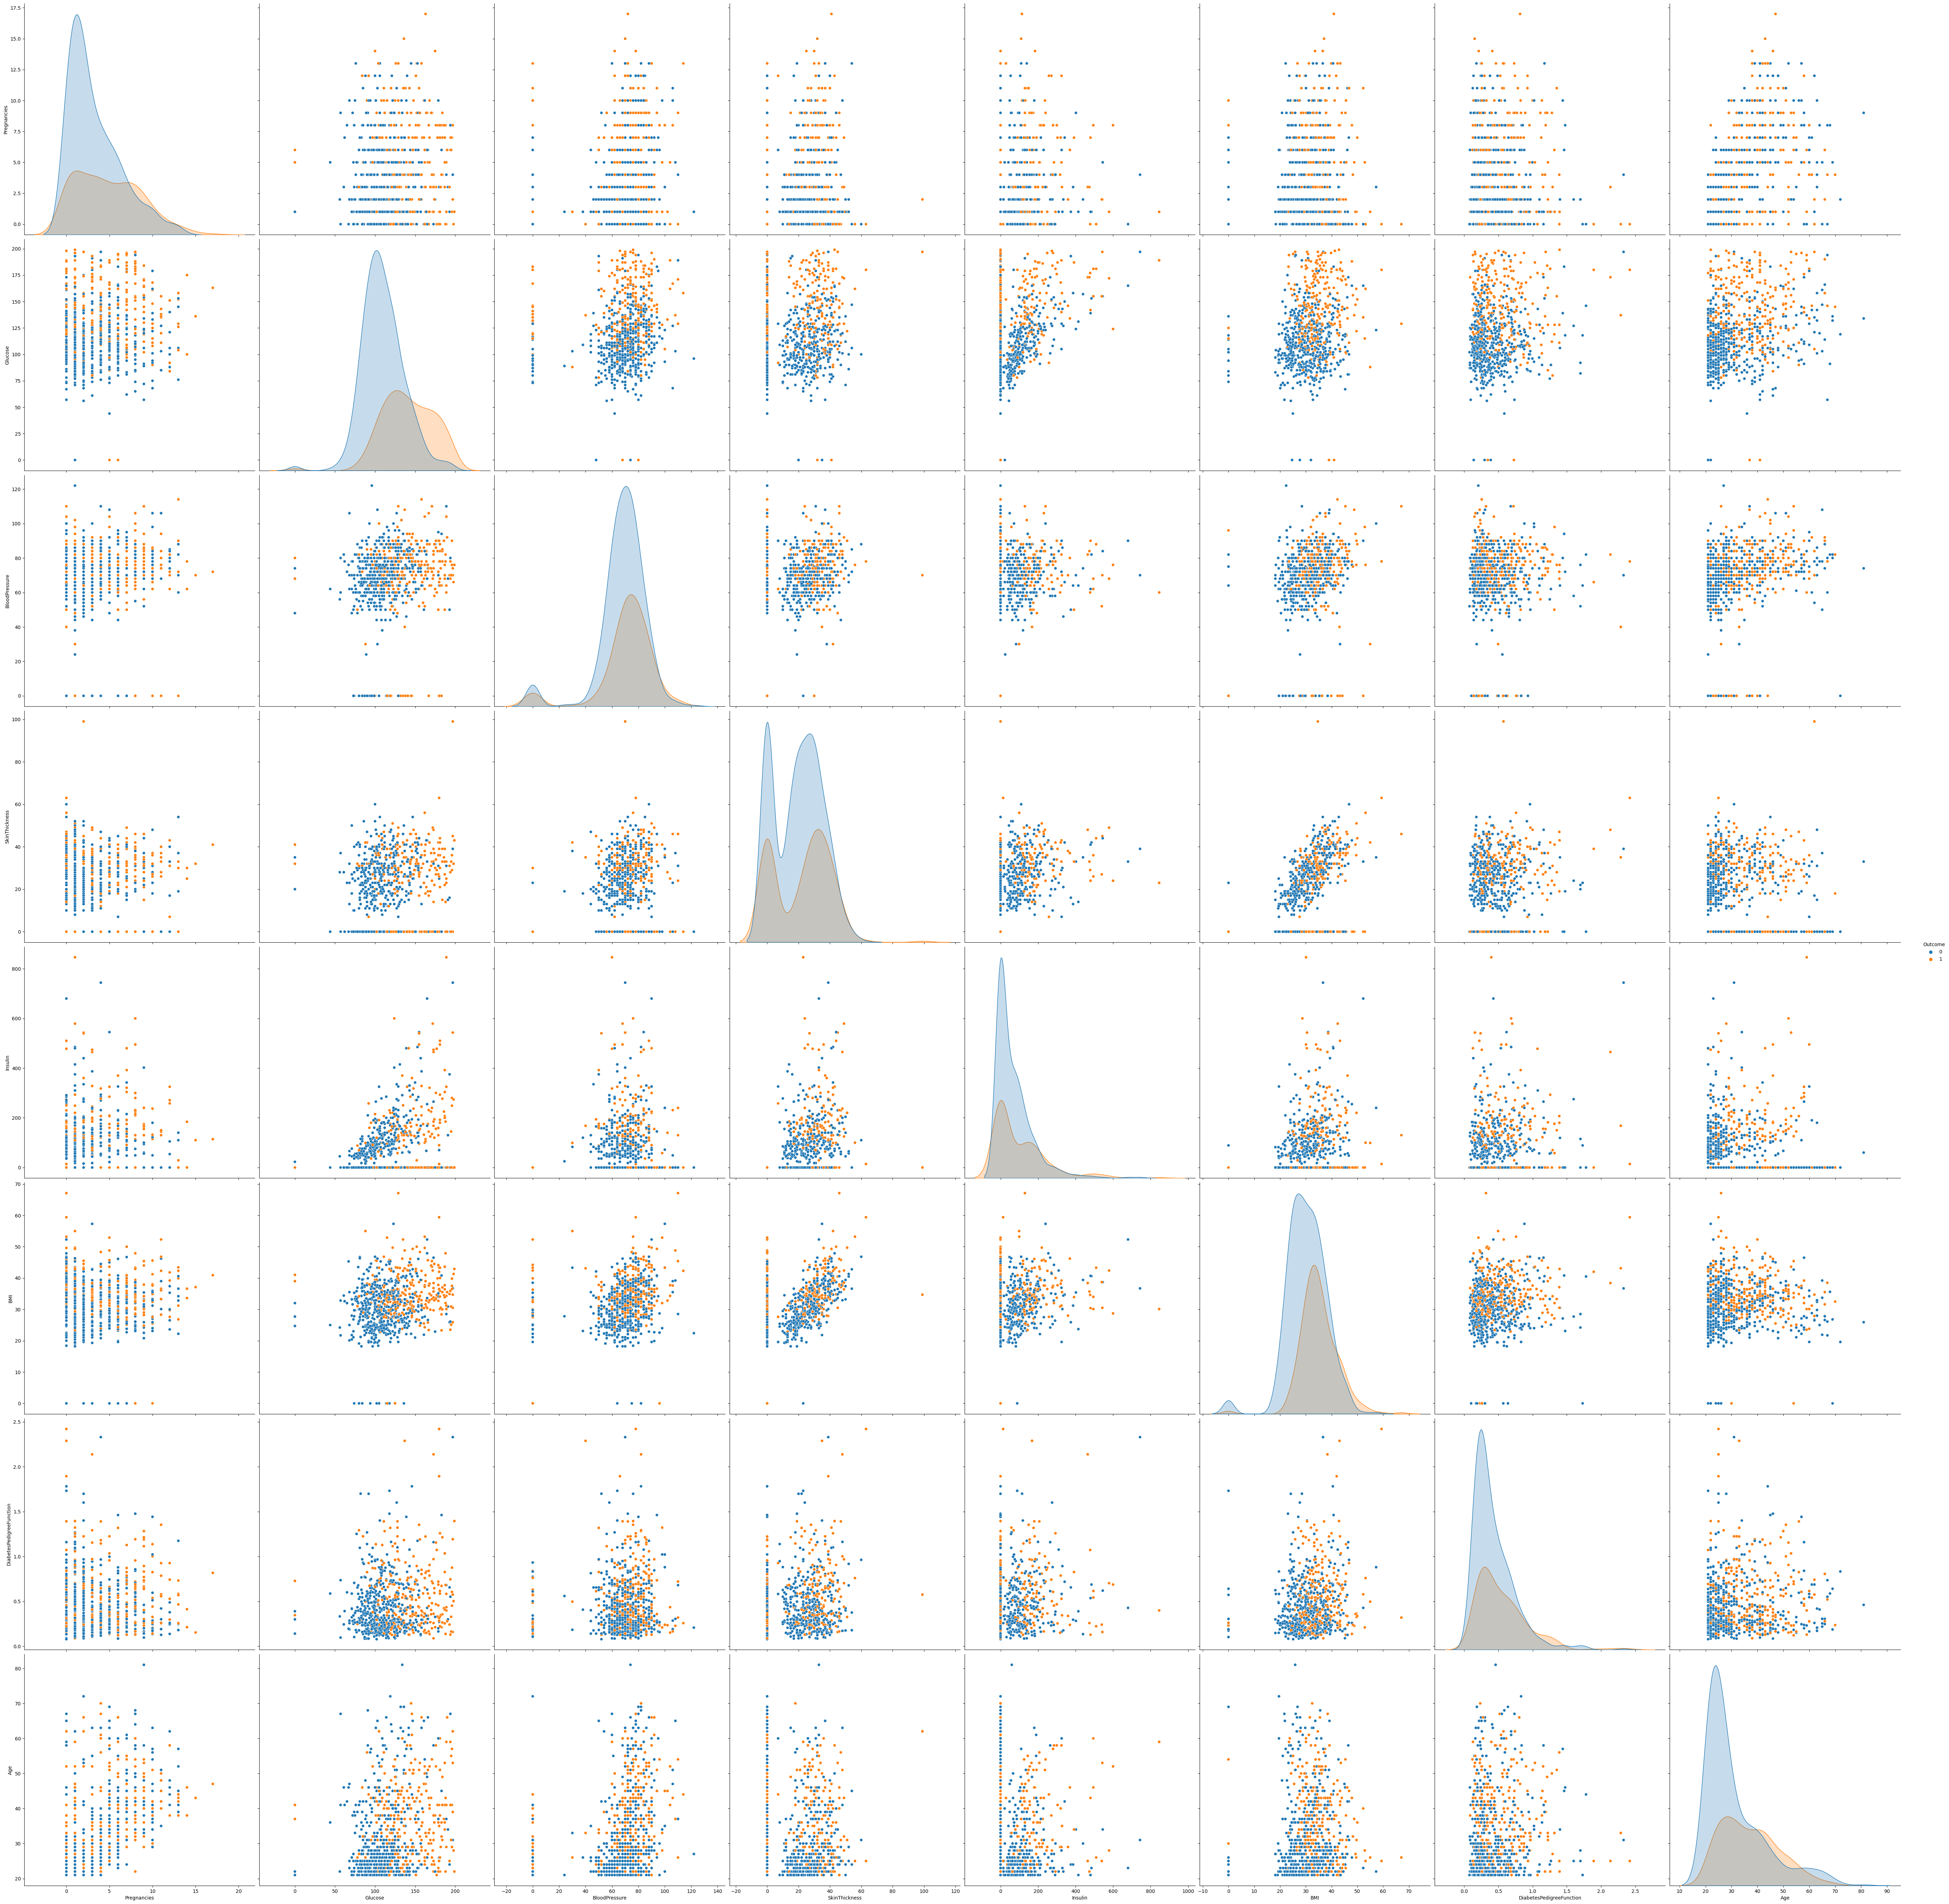

In [17]:
sns.pairplot(diab_dset,hue = 'Outcome',size = 7)

# **Histogram Plot**

Text(0.5, 1.0, 'Histogram Of Age')

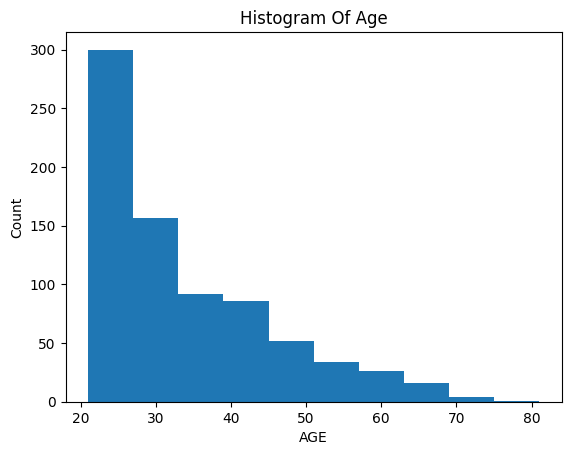

In [18]:
plt.hist(diab_dset['Age'])
plt.xlabel('AGE')
plt.ylabel("Count")
plt.title('Histogram Of Age')

Text(0.5, 1.0, 'Histogram Of Pregnancies')

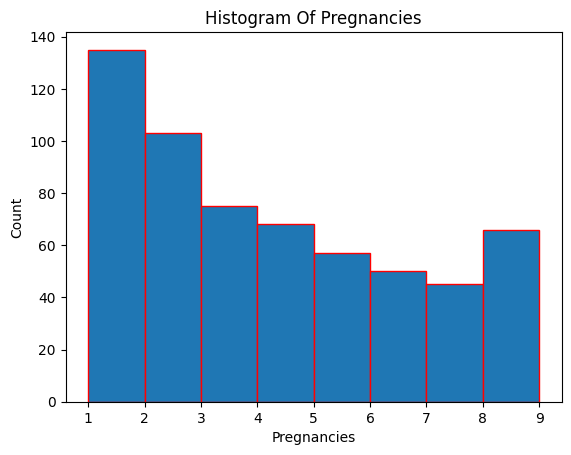

In [19]:
plt.hist(diab_dset['Pregnancies'],[1,2,3,4,5,6,7,8,9],ec = 'red')
plt.xlabel('Pregnancies')
plt.ylabel("Count")
plt.title('Histogram Of Pregnancies')

In [20]:
diab_dset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Outlier Detection

Z -Score method

Z = ((X - Mean) / Standard Deviation)

In [21]:
outliers = []

def detect_outlier(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score  = (i - mean)/std
    if np.abs(z_score) > threshold :
      outliers.append(i);
      return outliers


In [22]:
out = diab_dset['Age']

print(detect_outlier(out))



[69]


##Normal Distribution and Emprical RULE

In [23]:
import seaborn as sn
from scipy.stats import norm

In [24]:
print(np.mean(diab_dset['Age']))
np.std(diab_dset['Age'])

33.240885416666664


11.752572645994181

<Axes: ylabel='Density'>

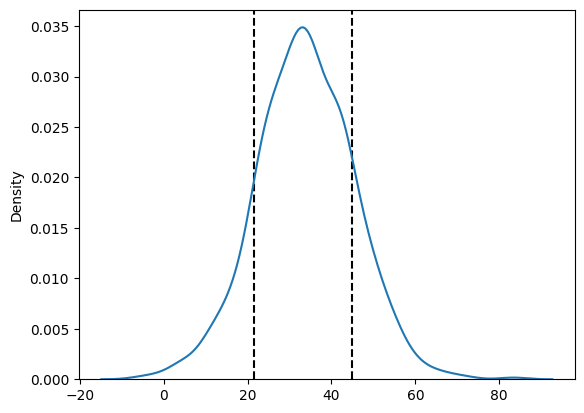

In [25]:
plt.axvline(np.mean(diab_dset['Age'])+ np.std(diab_dset['Age']) ,ls ='--',color = 'black')
plt.axvline(np.mean(diab_dset['Age'])- np.std(diab_dset['Age']),ls ='--',color = 'black')

sn.kdeplot(norm.rvs(np.mean(diab_dset['Age']),np.std(diab_dset['Age']),diab_dset['Age'].size))


In [26]:
norm.interval(.68,np.mean(diab_dset['BMI']),np.std(diab_dset['BMI']))

(24.157218874257424, 39.82793737574258)

# Box plot Outlier

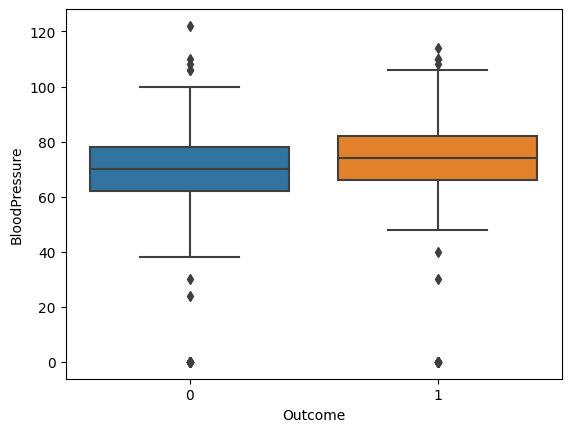

In [27]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = diab_dset );

**Machine learning model building**

In [40]:
X = diab_dset.drop(["Outcome"],axis = 1)
Y = diab_dset.loc[:,'Outcome']



0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.score(X_test,Y_test)

0.8441558441558441

In [ ]:
diabetes_dataset.corr()

In [ ]:
diabetes_dataset.plot()
plt.show()

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe().T

In [ ]:
diabetes_dataset['Outcome'].value_counts()

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean().T

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

In [ ]:
print(Y)

Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')